In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import NormalDist


In [2]:
def evolve_kalman(x_0, phi, h, max_iter):
    evolution =[x_0]
    observables = []
    w = NormalDist(0 ,1).samples(max_iter)
    v = NormalDist(0 ,1).samples(max_iter)
    prev = x_0
    current = x_0
    for iter in range(max_iter):
        temp = current
        current = phi * prev + w[iter]
        prev = temp
        evolution.append(current)
        observables.append(h * current + v[iter])
    return evolution, observables


In [3]:
def predict_kalman(observables, phi, h, initial_ex, initial_var, max_iter):
    predictions = [initial_ex]
    pred_ex = initial_ex
    pred_var = initial_var
    z = []
    for iter in range(max_iter):
        now_ex = phi * pred_ex
        now_val = phi**2 * pred_var + 1
        K = now_val * h / (h**2 * now_val + 1)
        pred_ex = K * observables[iter] + (1 - K * h) * phi * now_ex
        pred_var = (now_val) / (h**2 * now_val + 1) 
        predictions.append(pred_ex)
    return predictions

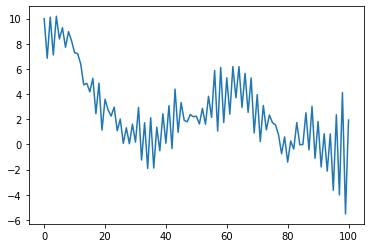

In [12]:
evolutions, observables = evolve_kalman(x_0=10, phi=0.9,h=1, max_iter=100)
plt.plot(np.arange(101), evolutions)

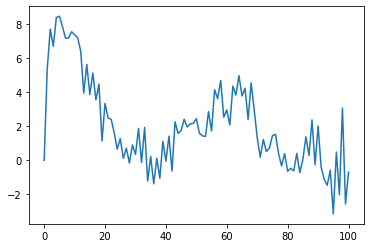

In [13]:
predictions = predict_kalman(observables, phi=0.9, h=1, initial_ex=0, initial_var=10, max_iter=100)
plt.plot(np.arange(101), predictions)